In [1]:
state = 'WV' 
year = 2010
objective_types = ['cut_edges']
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of WV has 3 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))
from WV_plans_2010 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 1575 plans from file.


In [6]:
from epsilon_constraint import epsilon_constraint_method
from pareto import filter_and_sort_pareto
from metrics import scores

plans_dict = {}
for obj_type in objective_types:
    
    print(f"\n{'#' * 100}")
    print(f"Applying epsilon-constraint method for {state} with compactness objective {obj_type}")
    print(f"{'#' * 100}\n")
    
    plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
    _,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
    print(f"Passing {len(nondominated_warm_starts_plans)} nondominated warm start plans")
    
    (new_plans, obj_bounds, deviations) = epsilon_constraint_method(
                G,                 
                obj_type,          
                contiguity ='lcut',                                             # {'lcut', 'scf', 'shir'} 
                cutoff=None,       
                verbose=True,
                warm_start_mode ='user',                                        # {'None', 'user', 'refinement'}
                warm_starts=nondominated_warm_starts_plans,                                         # if you have user define warm starts else it is None
                starting_deviation=starting_deviation, 
                time_limit=60, 
                sizes=None,      
                max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
                symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
                state=state,
                year=year
            )
    plans_dict[(state, obj_type)] = list(zip(new_plans, obj_bounds, deviations))
    warm_starts += new_plans


####################################################################################################
Applying epsilon-constraint method for WV with compactness objective cut_edges
####################################################################################################

Passing 12 nondominated warm start plans
Initially, L = 611489 and U = 623841 and k = 3.

****************************************
Trying deviation = 6176.6466666666665
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 8, 15, 18, 25, 28, 38, 40, 41, 43, 44, 50, 53], [2, 4, 6, 7, 11, 12, 14, 16, 17, 19, 20, 29, 30, 31, 32, 33, 34, 36, 42, 46, 48, 49, 51, 54], [0, 3, 5, 9, 10, 13, 21, 22, 23, 24, 26, 27, 35, 37, 39, 45, 47, 52]]
Objective value: 23
Deviation: 3014.666666666628

****************************************
Running labeling model!
****************************************
L = 611489 and U = 623841 and k = 3
Set parameter Username
Set parameter Licens

Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 2168 rows, 1825 columns and 7001 nonzeros
Model fingerprint: 0x69440da9
Variable types: 495 continuous, 1330 integer (1330 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+05]

User MIP start produced solution with objective 25 (0.02s)
Loaded user MIP start with objective 25

Presolv

Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 2168 rows, 1825 columns and 7001 nonzeros
Model fingerprint: 0x75ee318c
Variable types: 495 continuous, 1330 integer (1330 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+05]

User MIP start produced solution with objective 27 (0.01s)
Loaded user MIP start with objective 27

Presolve removed 1133 rows and 833 columns
Presolve time: 0.02s
Presolved: 1035 rows, 992 columns, 3530 nonzeros
Variable types: 0 continuous, 992 integer (989 binary)

Root relaxation: objective 8.265345e+00, 889 iterations, 0.02 seconds (0.02 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap |

Model fingerprint: 0xe371d45b
Variable types: 495 continuous, 1330 integer (1330 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+05]

User MIP start produced solution with objective 29 (0.01s)
Loaded user MIP start with objective 29

Presolve removed 1088 rows and 831 columns
Presolve time: 0.01s
Presolved: 1080 rows, 994 columns, 3623 nonzeros
Variable types: 0 continuous, 994 integer (988 binary)

Root relaxation: objective 8.273444e+00, 800 iterations, 0.02 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    8.27344    0  183   29.00000    8.27344  71.5%     -    0s
     0     0    8.95549    0  193   29.00000    8.95549  69.1%     -    0s
     0     0    9.39248    0  200   29.00000    9.39248  67.6%     -    0s
     0     0    

Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 2168 rows, 1825 columns and 7001 nonzeros
Model fingerprint: 0x6f42219c
Variable types: 495 continuous, 1330 integer (1330 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+05]

User MIP start produced solution with objective 31 (0.02s)
Loaded user MIP start with objective 31

Presolv

 240582 63248   26.68241   35   88   32.00000   25.83388  19.3%  31.5   50s
 265781 67673   28.61800   34  140   32.00000   26.00000  18.8%  31.4   55s

Cutting planes:
  Gomory: 4
  Inf proof: 1
  Zero half: 9
  RLT: 1
  Lazy constraints: 39

Explored 289969 nodes (9079739 simplex iterations) in 60.06 seconds (32.51 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 32 

Time limit reached
Best objective 3.200000000000e+01, best bound 2.700000000000e+01, gap 15.6250%

User-callback calls 585049, time in user-callback 1.93 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = [[12, 18, 25, 28, 31, 36, 38, 41, 44, 51], [0, 2, 3, 4, 5, 6, 10, 11, 13, 14, 16, 17, 20, 24, 29, 30, 32, 33, 35, 37, 45, 46, 48, 49, 50, 52], [1, 7, 8, 9, 15, 19, 21, 22, 23, 26,

 77961 49473   33.69412   49   61   41.00000   23.07286  43.7%  31.2   15s
 107227 68012     cutoff   58        41.00000   23.37793  43.0%  31.3   20s
 145538 90927   31.80503   47   40   41.00000   23.68136  42.2%  29.9   25s
 182344 112094     cutoff   56        41.00000   23.94189  41.6%  29.6   30s
 219513 133724   24.94201   35  117   41.00000   24.10344  41.2%  29.3   35s
 258208 155583   33.01597   37   32   41.00000   24.26416  40.8%  29.0   40s
 298751 178207   28.95976   67   47   41.00000   24.40172  40.5%  28.8   45s
 338800 200526   28.92118   41   29   41.00000   24.52461  40.2%  28.6   50s
 376931 220646   35.18605   56   26   41.00000   24.63400  39.9%  28.5   55s
 411316 239819   26.74151   36   45   41.00000   24.73127  39.7%  28.5   60s

Cutting planes:
  Gomory: 4

Explored 413516 nodes (11769409 simplex iterations) in 60.08 seconds (31.88 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 41 

Time limit reached
Best objective 4.1000000


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    8.27780    0  184          -    8.27780      -     -    0s
     0     0    9.10389    0  194          -    9.10389      -     -    0s
     0     0    9.52710    0  209          -    9.52710      -     -    0s
     0     0    9.53926    0  212          -    9.53926      -     -    0s
     0     0    9.56480    0  212          -    9.56480      -     -    0s
     0     0    9.56480    0  214          -    9.56480      -     -    0s
     0     0    9.59347    0  212          -    9.59347      -     -    0s
     0     0    9.60361    0  211          -    9.60361      -     -    0s
     0     2    9.64693    0  211          -    9.64693      -     -    0s
  9824  6698   24.66920   27  121          -   19.68058      -  44.8    5s
 31932 23784   29.00000   37   66          -   21.53181      -  39.8   10s
 50738 38456   32.95078

Final county-level GEOID district list for Enacted map is:
[['54003', '54035', '54083', '54105', '54079', '54007', '54027', '54097', '54065', '54087', '54013', '54031', '54041', '54037', '54071', '54039', '54015'], ['54017', '54049', '54057', '54001', '54077', '54061', '54085', '54093', '54051', '54033', '54095', '54107', '54091', '54103', '54073', '54023', '54009', '54029', '54069', '54021'], ['54025', '54005', '54081', '54055', '54089', '54011', '54019', '54099', '54067', '54045', '54101', '54047', '54059', '54053', '54109', '54063', '54043', '54075']]
Final county-level districts for Enacted map is:
[[6, 14, 21, 22, 23, 27, 28, 29, 30, 37, 39, 41, 44, 47, 50, 51, 52], [0, 2, 3, 4, 5, 10, 11, 13, 16, 17, 20, 24, 26, 31, 32, 33, 35, 45, 48, 49], [1, 7, 8, 9, 12, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]]
Deviation for 'Enacted map': 3197.333333333372
Objective values for 'Enacted map': {'inverse_Polsby_Popper': 7.7477, 'cut_edges': 34, 'perimeter': 42.1245, 'average_Polsby_P

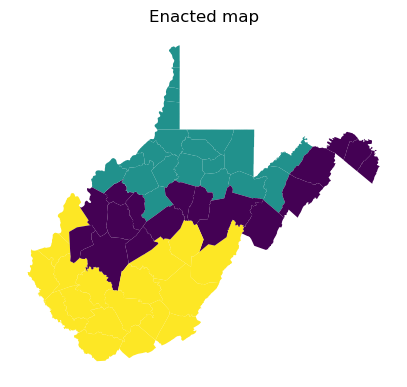

Final county-level GEOID district list for Facemire map is:
[['54003', '54027', '54083', '54097', '54065', '54077', '54017', '54061', '54023', '54031', '54049', '54037', '54091', '54057', '54071', '54093', '54001', '54033'], ['54079', '54041', '54039', '54035', '54085', '54051', '54095', '54015', '54107', '54103', '54087', '54105', '54007', '54073', '54013', '54009', '54029', '54069', '54021'], ['54025', '54005', '54081', '54055', '54089', '54011', '54019', '54099', '54067', '54045', '54101', '54047', '54059', '54053', '54109', '54063', '54043', '54075']]
Final county-level districts for Facemire map is:
[[0, 3, 5, 10, 13, 21, 22, 23, 24, 26, 27, 33, 35, 37, 39, 45, 47, 52], [2, 4, 6, 11, 14, 16, 17, 20, 28, 29, 30, 31, 32, 41, 44, 48, 49, 50, 51], [1, 7, 8, 9, 12, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54]]
Deviation for 'Facemire map': 1523.6666666666279
Objective values for 'Facemire map': {'inverse_Polsby_Popper': 5.4942, 'cut_edges': 27, 'perimeter': 35.9639, 'average_Pol

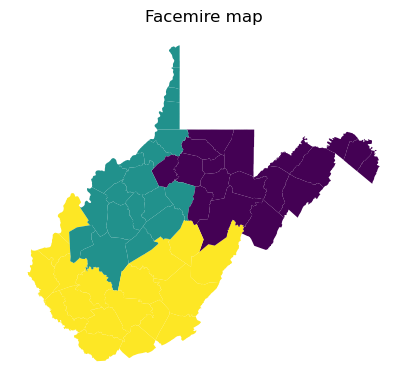

Final county-level GEOID district list for Cooper plan 1 is:
[['54017', '54049', '54057', '54063', '54001', '54077', '54101', '54093', '54075', '54033', '54089', '54031', '54091', '54071', '54025', '54003', '54027', '54083', '54097', '54007', '54065', '54023', '54037'], ['54055', '54081', '54079', '54019', '54067', '54045', '54047', '54059', '54109', '54043', '54005', '54039'], ['54041', '54035', '54061', '54099', '54085', '54051', '54095', '54015', '54107', '54053', '54103', '54087', '54105', '54011', '54073', '54013', '54009', '54029', '54069', '54021']]
Final county-level districts for Cooper plan 1 is:
[[3, 5, 7, 9, 10, 13, 21, 22, 23, 24, 26, 27, 33, 35, 37, 39, 42, 45, 46, 47, 51, 52, 54], [1, 8, 12, 15, 19, 28, 34, 36, 40, 43, 44, 53], [0, 2, 4, 6, 11, 14, 16, 17, 18, 20, 25, 29, 30, 31, 32, 38, 41, 48, 49, 50]]
Deviation for 'Cooper plan 1': 323.66666666662786
Objective values for 'Cooper plan 1': {'inverse_Polsby_Popper': 7.3143, 'cut_edges': 34, 'perimeter': 40.5264, 'average

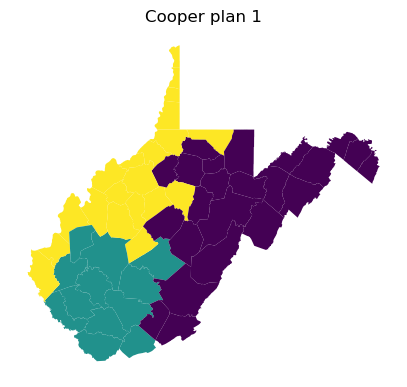

Final county-level GEOID district list for Cooper plan 2 is:
[['54017', '54057', '54001', '54077', '54061', '54093', '54051', '54095', '54031', '54071', '54103', '54003', '54027', '54083', '54073', '54065', '54023', '54037', '54009', '54029', '54069'], ['54055', '54081', '54079', '54019', '54067', '54045', '54047', '54059', '54109', '54043', '54005', '54039'], ['54049', '54041', '54063', '54035', '54099', '54085', '54101', '54075', '54033', '54015', '54089', '54107', '54053', '54091', '54025', '54097', '54105', '54007', '54011', '54087', '54013', '54021']]
Final county-level districts for Cooper plan 2 is:
[[0, 2, 3, 4, 11, 13, 16, 17, 21, 22, 23, 24, 26, 27, 32, 33, 37, 39, 45, 47, 49], [1, 8, 12, 15, 19, 28, 34, 36, 40, 43, 44, 53], [5, 6, 7, 9, 10, 14, 18, 20, 25, 29, 30, 31, 35, 38, 41, 42, 46, 48, 50, 51, 52, 54]]
Deviation for 'Cooper plan 2': 232.66666666662786
Objective values for 'Cooper plan 2': {'inverse_Polsby_Popper': 8.1779, 'cut_edges': 36, 'perimeter': 43.359, 'average_

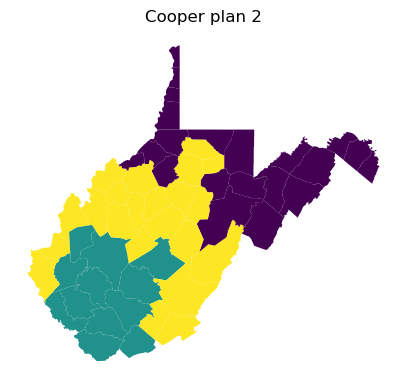

Final county-level GEOID district list for Cooper plan 3 is:
[['54017', '54057', '54001', '54077', '54061', '54093', '54051', '54095', '54031', '54071', '54103', '54003', '54027', '54083', '54073', '54065', '54023', '54037', '54009', '54029', '54069'], ['54035', '54079', '54105', '54011', '54087', '54099', '54107', '54085', '54053', '54043', '54005', '54039', '54015'], ['54049', '54041', '54047', '54059', '54063', '54055', '54081', '54019', '54101', '54075', '54033', '54089', '54045', '54091', '54025', '54097', '54007', '54013', '54067', '54109', '54021']]
Final county-level districts for Cooper plan 3 is:
[[0, 2, 3, 4, 11, 13, 16, 17, 21, 22, 23, 24, 26, 27, 32, 33, 37, 39, 45, 47, 49], [1, 6, 8, 14, 18, 25, 28, 31, 38, 41, 44, 48, 50], [5, 7, 9, 10, 12, 15, 19, 20, 29, 30, 34, 35, 36, 40, 42, 43, 46, 51, 52, 53, 54]]
Deviation for 'Cooper plan 3': 115.66666666662786
Objective values for 'Cooper plan 3': {'inverse_Polsby_Popper': 7.2532, 'cut_edges': 35, 'perimeter': 40.65, 'average_P

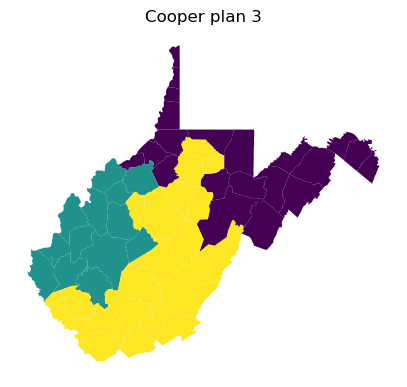

In [7]:
# Special maps
from metrics import county_level_districts, compute_obj, observed_deviation_persons
from draw import draw_plan
import math
filename3 = state + '_block.json'

special_maps = ['Enacted map','Facemire map','Cooper plan 1','Cooper plan 2','Cooper plan 3']
special_maps_scores = {}
G_copy = G.copy()
G_copy._k = G._k
G_copy._ideal_population = G._ideal_population

for map in special_maps:
    if map == 'Enacted map':
        csv_file_path = '../../dat/'+str(year)+'/WV_enacted_map_2010_block-assignments.csv'
    if map == 'Facemire map':
        csv_file_path = '../../dat/'+str(year)+'/WV_Facemire_Amendment_block-assignments.csv'
    if map == 'Cooper plan 1':
        csv_file_path = '../../dat/'+str(year)+'/Cooper_Plan_1_block-assignments.csv'
    if map == 'Cooper plan 2':   
        csv_file_path = '../../dat/'+str(year)+'/Cooper_Plan_2_block-assignments.csv'
    if map == 'Cooper plan 3':
        csv_file_path = '../../dat/'+str(year)+'/Cooper_Plan_3_block-assignments.csv'
        
    counties_GEOID_district_list, districts = county_level_districts(G_copy, csv_file_path, filepath, filename3, state, G_copy._k, year)
    print(f"Final county-level GEOID district list for {map} is:")
    print(counties_GEOID_district_list)
    print(f"Final county-level districts for {map} is:")
    print(districts)
    
    deviation = observed_deviation_persons(G_copy, districts, G_copy._ideal_population)
    G_copy._L = math.ceil(G_copy._ideal_population - deviation)
    G_copy._U = math.floor(G_copy._ideal_population + deviation)
    
    obj_types = ['inverse_Polsby_Popper', 'cut_edges', 'perimeter', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper'] 
    special_maps_scores[map] = [deviation, {obj: round(compute_obj(G_copy, districts, obj), 4) for obj in obj_types}]
    deviation, objective_values = special_maps_scores[map]
    print(f"Deviation for '{map}': {deviation}")
    print(f"Objective values for '{map}': {objective_values}")

    title = f'{map}'
    draw_plan( filepath, filename2, G, districts, title=title, year=year )

In [8]:
from pareto import plot_pareto_frontiers

epsilon = 1 / (2 * G._k)
for (state, obj_type), result in plans_dict.items():
    
    min_deviation = min(round(r[2], 1) for r in result)
    if min_deviation < epsilon:
        no_solution_region = None
    else:
        no_solution_region = [0, min_deviation]
        print(f"No feasible solution was found within the region: {no_solution_region}")
        
    plot_pareto_frontiers(
                    G,
                    method='epsilon_constraint_method',
                    plans=None,                                   #if method ='epsilon_constraint_method' is None 
                    obj_types=obj_type,                               
                    ideal_population=G._ideal_population,
                    state=state,
                    filepath=filepath,
                    filename2=filename2,
                    no_solution_region=no_solution_region,
                    year=year,
                    result=result,                               #if method ='heuristic' is None 
                    special_maps_scores=special_maps_scores
                 )

No feasible solution was found within the region: [0, 2.3]


TypeError: plot_pareto_frontiers() got an unexpected keyword argument 'special_maps_scores'